## Course Project Part 2

**Deadline: Oct 28, 2021. Before Class**


### Overview.

We'll continue to work on the dataset college_data.csv.   There's a new file called college_variables.csv, which might be helpful.

In part 2, you'll evaluate different hypothesis about costs and academic performance.


In [1]:
import pandas, seaborn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, cross_validate

df = pandas.read_csv('../../Datasets/college_data.csv')


---
**Problem 1**

Which features in the dataset might be used to define the expense to attend a school?  Define clearly the expense of a school.  

The features were used to define the expense to attend a school is:
- Name
- 'Tuition and fees, 2010-11',
- 'Tuition and fees, 2011-12',
- 'Tuition and fees, 2012-13',
- 'Tuition and fees, 2013-14'
- 'Total price for in-state students living on campus 2013-14',
- 'Total price for out-of-state students living on campus 2013-14'

In [2]:
[col for col in df.columns if "Tuition" in col]

['Tuition and fees, 2010-11',
 'Tuition and fees, 2011-12',
 'Tuition and fees, 2012-13',
 'Tuition and fees, 2013-14']

In [3]:
[col for col in df.columns if "Total price" in col]

['Total price for in-state students living on campus 2013-14',
 'Total price for out-of-state students living on campus 2013-14']

In [4]:
df.dropna()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)


In [5]:
df['tuition'] = df['Tuition and fees, 2010-11'] + df['Tuition and fees, 2011-12'] + df['Tuition and fees, 2012-13'] + df['Tuition and fees, 2013-14']

In [6]:
df.tuition


0        26992.0
1        26074.0
2        30750.0
3        33572.0
4        31898.0
          ...   
1529         NaN
1530    117130.0
1531         NaN
1532     88796.0
1533     43680.0
Name: tuition, Length: 1534, dtype: float64

In [7]:
df['expense in-state'] = df['Tuition and fees, 2013-14'] + df['Total price for in-state students living on campus 2013-14']
df['expense out-of-state'] = df['Tuition and fees, 2013-14'] + df['Total price for out-of-state students living on campus 2013-14']
df[['Name','expense in-state', 'expense out-of-state']].dropna()

,Name,expense in-state,expense out-of-state
0,Alabama A & M University,29031.0,34623.0
1,University of Alabama at Birmingham,29701.0,38893.0
3,University of Alabama in Huntsville,32658.0,44972.0
4,Alabama State University,27006.0,33942.0
5,The University of Alabama,36450.0,50950.0
...,...,...,...
1520,Georgia Gwinnett College,26932.0,36390.0
1525,University of South Florida-St Petersburg,25990.0,36906.0
1526,University of the West,31126.0,31126.0
1530,The Kingâ€™s College,80017.0,80017.0


---
**Problem 2** 

Compare expenses between public and private schools.

In [8]:
import seaborn

In [9]:
[col for col in df.columns if "Sector" in col]

['Sector of institution']

<AxesSubplot:xlabel='Sector of institution', ylabel='expense in-state'>

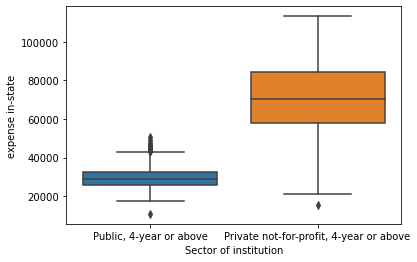

In [10]:
seaborn.boxplot(data=df, x="Sector of institution", y="expense in-state")

<AxesSubplot:xlabel='Sector of institution', ylabel='expense out-of-state'>

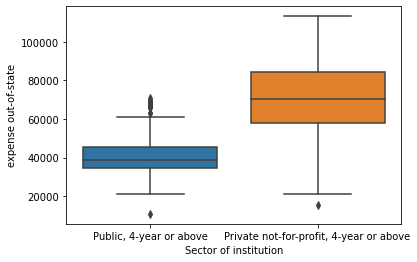

In [11]:
seaborn.boxplot(data=df, x="Sector of institution", y="expense out-of-state")

From the visualization of the boxplot, private institutions tend to cost more to attend than public institutions.

---
**Problem 3** 

Compare expenses between schools in different states.

In [12]:
[col for col in df.columns if "State" in col]

['State abbreviation']

In [13]:
df3 = df.groupby('State abbreviation')['expense in-state'].mean()
df3

State abbreviation
Alabama                 40129.269231
Alaska                  35643.750000
Arizona                 48960.571429
Arkansas                38006.300000
California              64941.911392
Colorado                48601.647059
Connecticut             75935.500000
Delaware                42820.333333
District of Columbia    82116.000000
Florida                 54112.205128
Georgia                 45029.878049
Hawaii                  38053.000000
Idaho                   34548.714286
Illinois                64099.160000
Indiana                 59948.861111
Iowa                    65373.518519
Kansas                  46361.521739
Kentucky                49854.642857
Louisiana               38677.210526
Maine                   58675.625000
Maryland                60234.619048
Massachusetts           77995.561404
Michigan                49341.804878
Minnesota               60406.800000
Mississippi             33697.933333
Missouri                47717.305556
Montana            

<AxesSubplot:xlabel='State abbreviation'>

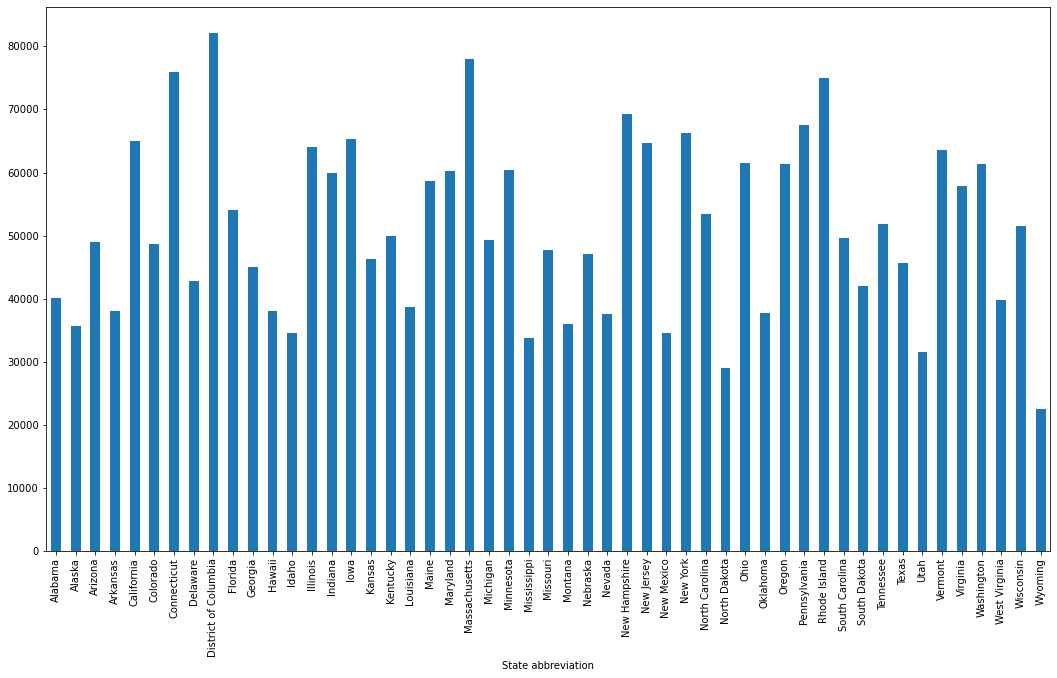

In [14]:
df3.plot(kind = "bar",figsize = (18,10)) #Plot the numbers of colleges/universities in each state


From this bar graph, the average cost to attend college or university in different states. Comparing one year between Wyoming and Massachusetts, Wyoming has the lowest cost to attend school.

---
**Problem 4** 

Compare expenses between public and private schools in different states.

In [15]:
df['Sector of institution']

0                       Public, 4-year or above
1                       Public, 4-year or above
2       Private not-for-profit, 4-year or above
3                       Public, 4-year or above
4                       Public, 4-year or above
                         ...                   
1529                    Public, 4-year or above
1530    Private not-for-profit, 4-year or above
1531    Private not-for-profit, 4-year or above
1532    Private not-for-profit, 4-year or above
1533    Private not-for-profit, 4-year or above
Name: Sector of institution, Length: 1534, dtype: object

In [16]:
public = df[ df['Sector of institution'] == "Public, 4-year or above"]
public

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB),tuition,expense in-state,expense out-of-state
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,1.0,32.0,89.0,89.0,1.0,NaN,NaN,26992.0,29031.0,34623.0
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,0.0,60.0,56.0,55.0,5.0,24136.0,NaN,26074.0,29701.0,38893.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,1.0,63.0,46.0,46.0,3.0,11502.0,NaN,33572.0,32658.0,44972.0
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,11.0,34.0,81.0,81.0,0.0,13202.0,NaN,31898.0,27006.0,33942.0
5,100751,The University of Alabama,2013,35487-0166,Doctor's degree - research/scholarship and pro...,Tuscaloosa County,-87.545766,33.214400,Not applicable,Implied no,...,3.0,50.0,42.0,41.0,8.0,19469.0,NaN,35150.0,36450.0,50950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,441900,Nevada State College,2013,89002,Bachelor's degree,Clark County,-114.938929,35.987249,Not applicable,Implied no,...,59.0,24.0,36.0,35.0,1.0,243.0,NaN,16549.0,NaN,NaN
1511,441937,California State University-Channel Islands,2013,93012,Master's degree,Ventura County,-119.043560,34.162949,Not applicable,Implied no,...,38.0,41.0,49.0,48.0,2.0,1610.0,NaN,24073.0,31478.0,42638.0
1520,447689,Georgia Gwinnett College,2013,30043,Bachelor's degree,Gwinnett County,-84.001135,33.979915,Not applicable,Implied no,...,26.0,2.0,46.0,46.0,1.0,NaN,NaN,19948.0,26932.0,36390.0
1525,448840,University of South Florida-St Petersburg,2013,33701-9807,Master's degree,Pinellas County,-82.635657,27.762618,Not applicable,Implied no,...,80.0,43.0,51.0,51.0,1.0,3609.0,NaN,21351.0,25990.0,36906.0


In [17]:
public_in_state = public.groupby('State abbreviation')['expense in-state'].mean()
public_in_state

State abbreviation
Alabama                 29268.000000
Alaska                  23195.000000
Arizona                 33917.333333
Arkansas                25519.800000
California              33387.709677
Colorado                31324.454545
Connecticut             33844.600000
Delaware                33320.500000
District of Columbia             NaN
Florida                 26672.833333
Georgia                 27097.277778
Hawaii                  28381.000000
Idaho                   25995.500000
Illinois                37430.300000
Indiana                 29479.500000
Iowa                    27654.333333
Kansas                  25234.428571
Kentucky                28032.375000
Louisiana               25136.615385
Maine                   30334.000000
Maryland                31232.700000
Massachusetts           32304.636364
Michigan                33323.142857
Minnesota               30765.100000
Mississippi             26343.000000
Missouri                27544.846154
Montana            

<AxesSubplot:xlabel='State abbreviation'>

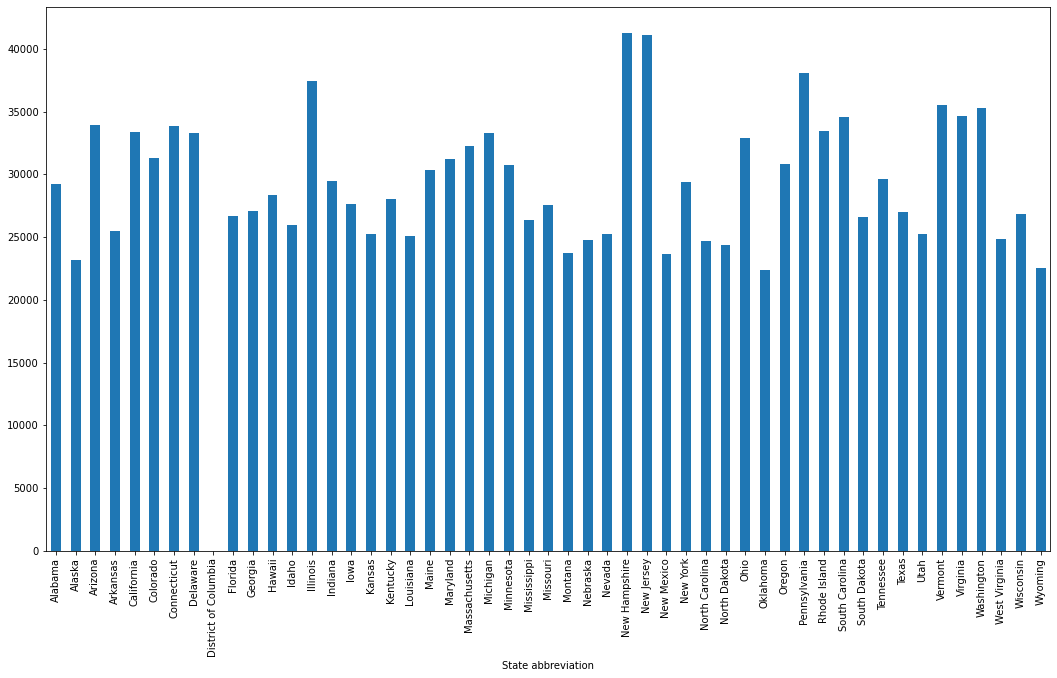

In [18]:
public_in_state.plot(kind = "bar",figsize = (18,10)) #Plot the numbers of colleges/universities in each state

In [19]:
public_out_of_state = public.groupby('State abbreviation')['expense out-of-state'].mean()
public_out_of_state

State abbreviation
Alabama                 38715.230769
Alaska                  33598.666667
Arizona                 48297.333333
Arkansas                31867.300000
California              47571.709677
Colorado                44268.545455
Connecticut             46830.400000
Delaware                46408.500000
District of Columbia             NaN
Florida                 41822.000000
Georgia                 38928.166667
Hawaii                  43045.000000
Idaho                   38075.000000
Illinois                47607.200000
Indiana                 43032.200000
Iowa                    41293.666667
Kansas                  35665.000000
Kentucky                39009.875000
Louisiana               34341.000000
Maine                   41968.000000
Maryland                42098.000000
Massachusetts           41549.272727
Michigan                45595.000000
Minnesota               34508.500000
Mississippi             32388.000000
Missouri                35835.076923
Montana            

<AxesSubplot:xlabel='State abbreviation'>

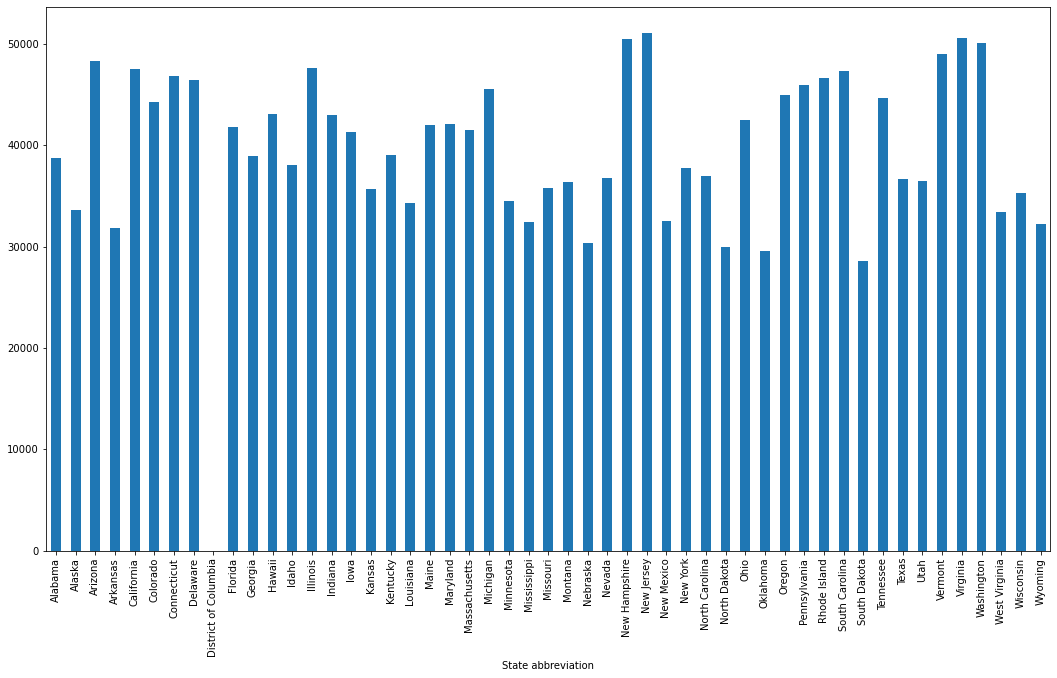

In [20]:
public_out_of_state.plot(kind = "bar",figsize = (18,10)) 

From the bar graph, the average cost between public and private institutions in different states. Private institutions are more expensive.

---
**Problem 5** 

Which features can be used to define academic performance. Define clearly the academic performance of a school.  How do you compare the academic performance of two different schools?

In [21]:
[col for col in df.columns if "Estimated" in col]

['Estimated enrollment, total',
 'Estimated enrollment, full time',
 'Estimated enrollment, part time',
 'Estimated undergraduate enrollment, total',
 'Estimated undergraduate enrollment, full time',
 'Estimated undergraduate enrollment, part time',
 'Estimated freshman undergraduate enrollment, total',
 'Estimated freshman enrollment, full time',
 'Estimated freshman enrollment, part time',
 'Estimated graduate enrollment, total',
 'Estimated graduate enrollment, full time',
 'Estimated graduate enrollment, part time']

These features can be used to define academic performance:
- Freshmen SAT, ACT scores
- Tuition and fees
- Difference between number of estimated enrollment and number of receiving of each degree.

Depend on freshmen SAT, ACT scores of freshmen submitting, we were able to know the school accepts higher score have better academic performance than lower score. In addition, we look at the difference of number of estimated enrollment and number of receiving of each degree, that is if the difference is low, the school has good academic performance and vice versa. Tuition and fees also affect on academic performace, the school has expensive tuition and fees has a good academic performance than the school has not expensive.

To compare academic performance of two school, we compare freshmen SAT, ACT scores of two school, if which school have higher score, it's better. We also compare number of estimated enrollment and number of receiving of each degree.


---
**Problem 6** 

Carnegie Classification a way of categorizing universities. Is there a correlation between Carnegie Classiication and academic performance?

In [22]:
[col for col in df.columns if 'Carnegie' in col]

['Carnegie Classification 2010: Basic']

In [23]:
[col for col in df.columns if 'rate' in col]

['Graduation rate - Bachelor degree within 4 years, total',
 'Graduation rate - Bachelor degree within 5 years, total',
 'Graduation rate - Bachelor degree within 6 years, total']

In [56]:
df6 = df[['Carnegie Classification 2010: Basic','Graduation rate - Bachelor degree within 4 years, total']].dropna()
df6

,Carnegie Classification 2010: Basic,"Graduation rate - Bachelor degree within 4 years, total"
0,Master's Colleges and Universities (larger pro...,10.0
1,Research Universities (very high research acti...,29.0
2,Baccalaureate Colleges--Arts & Sciences,0.0
3,Research Universities (very high research acti...,16.0
4,Master's Colleges and Universities (larger pro...,9.0
...,...,...
1523,Baccalaureate/Associate's Colleges,25.0
1525,Master's Colleges and Universities (medium pro...,22.0
1526,Baccalaureate Colleges--Diverse Fields,33.0
1530,Baccalaureate Colleges--Arts & Sciences,57.0


In [57]:
df6 = df6.groupby('Carnegie Classification 2010: Basic')['Graduation rate - Bachelor degree within 4 years, total'].mean()

<AxesSubplot:ylabel='Carnegie Classification 2010: Basic'>

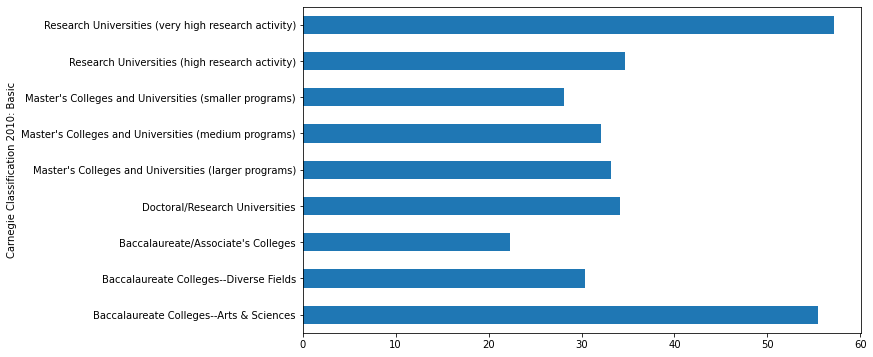

In [58]:
df6.plot(kind='barh', figsize=(10,6))

From the graph, we can see that there are some correlations between carnegie classification and graduation rate. 

---
**Problem 7**

How true is it that schools that are expensive to attend are also academically better?

In [28]:
[col for col in df.columns if 'tuition' in col]

['tuition']

In [29]:
[col for col in df.columns if 'rate' in col]

['Graduation rate - Bachelor degree within 4 years, total',
 'Graduation rate - Bachelor degree within 5 years, total',
 'Graduation rate - Bachelor degree within 6 years, total']

In [30]:
tuition = df[['Name',
              'tuition',
                'Graduation rate - Bachelor degree within 6 years, total']].dropna()


In [31]:
tuition

,Name,tuition,"Graduation rate - Bachelor degree within 6 years, total"
0,Alabama A & M University,26992.0,29.0
1,University of Alabama at Birmingham,26074.0,53.0
2,Amridge University,30750.0,67.0
3,University of Alabama in Huntsville,33572.0,48.0
4,Alabama State University,31898.0,25.0
...,...,...,...
1523,College America-Colorado Springs,64820.0,25.0
1525,University of South Florida-St Petersburg,21351.0,43.0
1526,University of the West,35226.0,33.0
1530,The Kingâ€™s College,117130.0,61.0


In [32]:
tuition.agg(['min', 'max'])[['tuition']]

,tuition
min,9552.0
max,184978.0


In [33]:
tuition['rank'] = pandas.cut(tuition['tuition'], 5, labels=['1','2','3','4','5'])
tuition

,Name,tuition,"Graduation rate - Bachelor degree within 6 years, total",rank
0,Alabama A & M University,26992.0,29.0,1
1,University of Alabama at Birmingham,26074.0,53.0,1
2,Amridge University,30750.0,67.0,1
3,University of Alabama in Huntsville,33572.0,48.0,1
4,Alabama State University,31898.0,25.0,1
...,...,...,...,...
1523,College America-Colorado Springs,64820.0,25.0,2
1525,University of South Florida-St Petersburg,21351.0,43.0,1
1526,University of the West,35226.0,33.0,1
1530,The Kingâ€™s College,117130.0,61.0,4


In [34]:
df7 = tuition[['Name','Graduation rate - Bachelor degree within 6 years, total','rank']]
df7

,Name,"Graduation rate - Bachelor degree within 6 years, total",rank
0,Alabama A & M University,29.0,1
1,University of Alabama at Birmingham,53.0,1
2,Amridge University,67.0,1
3,University of Alabama in Huntsville,48.0,1
4,Alabama State University,25.0,1
...,...,...,...
1523,College America-Colorado Springs,25.0,2
1525,University of South Florida-St Petersburg,43.0,1
1526,University of the West,33.0,1
1530,The Kingâ€™s College,61.0,4


In [35]:
df7 = df7.groupby('rank')[['Graduation rate - Bachelor degree within 6 years, total']].mean()
df7

,"Graduation rate - Bachelor degree within 6 years, total"
rank,
1,44.069903
2,48.408333
3,51.025210
4,64.393805
5,83.614815


<AxesSubplot:xlabel='rank'>

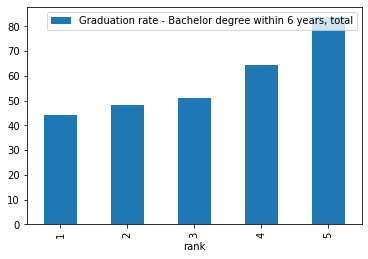

In [36]:
df7.plot(kind='bar')

From the bar graph that higher ranks (that is expensive school) have better academic performance

In [43]:
X=tuition[['rank']]
y=tuition[['Graduation rate - Bachelor degree within 6 years, total']]
model=LinearRegression()
model.fit(X, y)
result = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=100))
result['test_score'].mean()

/Users/trucnguyen/ENTER/lib/python3.8/site-packages/sklearn/utils/validation.py:956: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
/Users/trucnguyen/ENTER/lib/python3.8/site-packages/sklearn/utils/validation.py:956: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
/Users/trucnguyen/ENTER/lib/python3.8/site-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly

0.31584197720347107

---
**Problem 8**

Make one hypothesis that links academic performance with some other aspects (features).  Provide some reasons or intuitions why your hypothesis might be correct.   You don't have to prove it (yet).


The hypothesis:
- The school has higher ACT and SAT scores, will has good academic performance. The ACT and SAT scores can help predict a student's success in college, especially in the crucial first year. 